In [ ]:
!pip install opencv-python pytesseract numpy


In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import re
from google.colab.patches import cv2_imshow

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving 44.jpg to 44.jpg


In [28]:
uploaded = files.upload()
filename = next(iter(uploaded))


Saving logo.jpg to logo (1).jpg


In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving logo.jpg to logo.jpg


In [ ]:
# Load the image using OpenCV
img = cv2.imread('44.jpg')

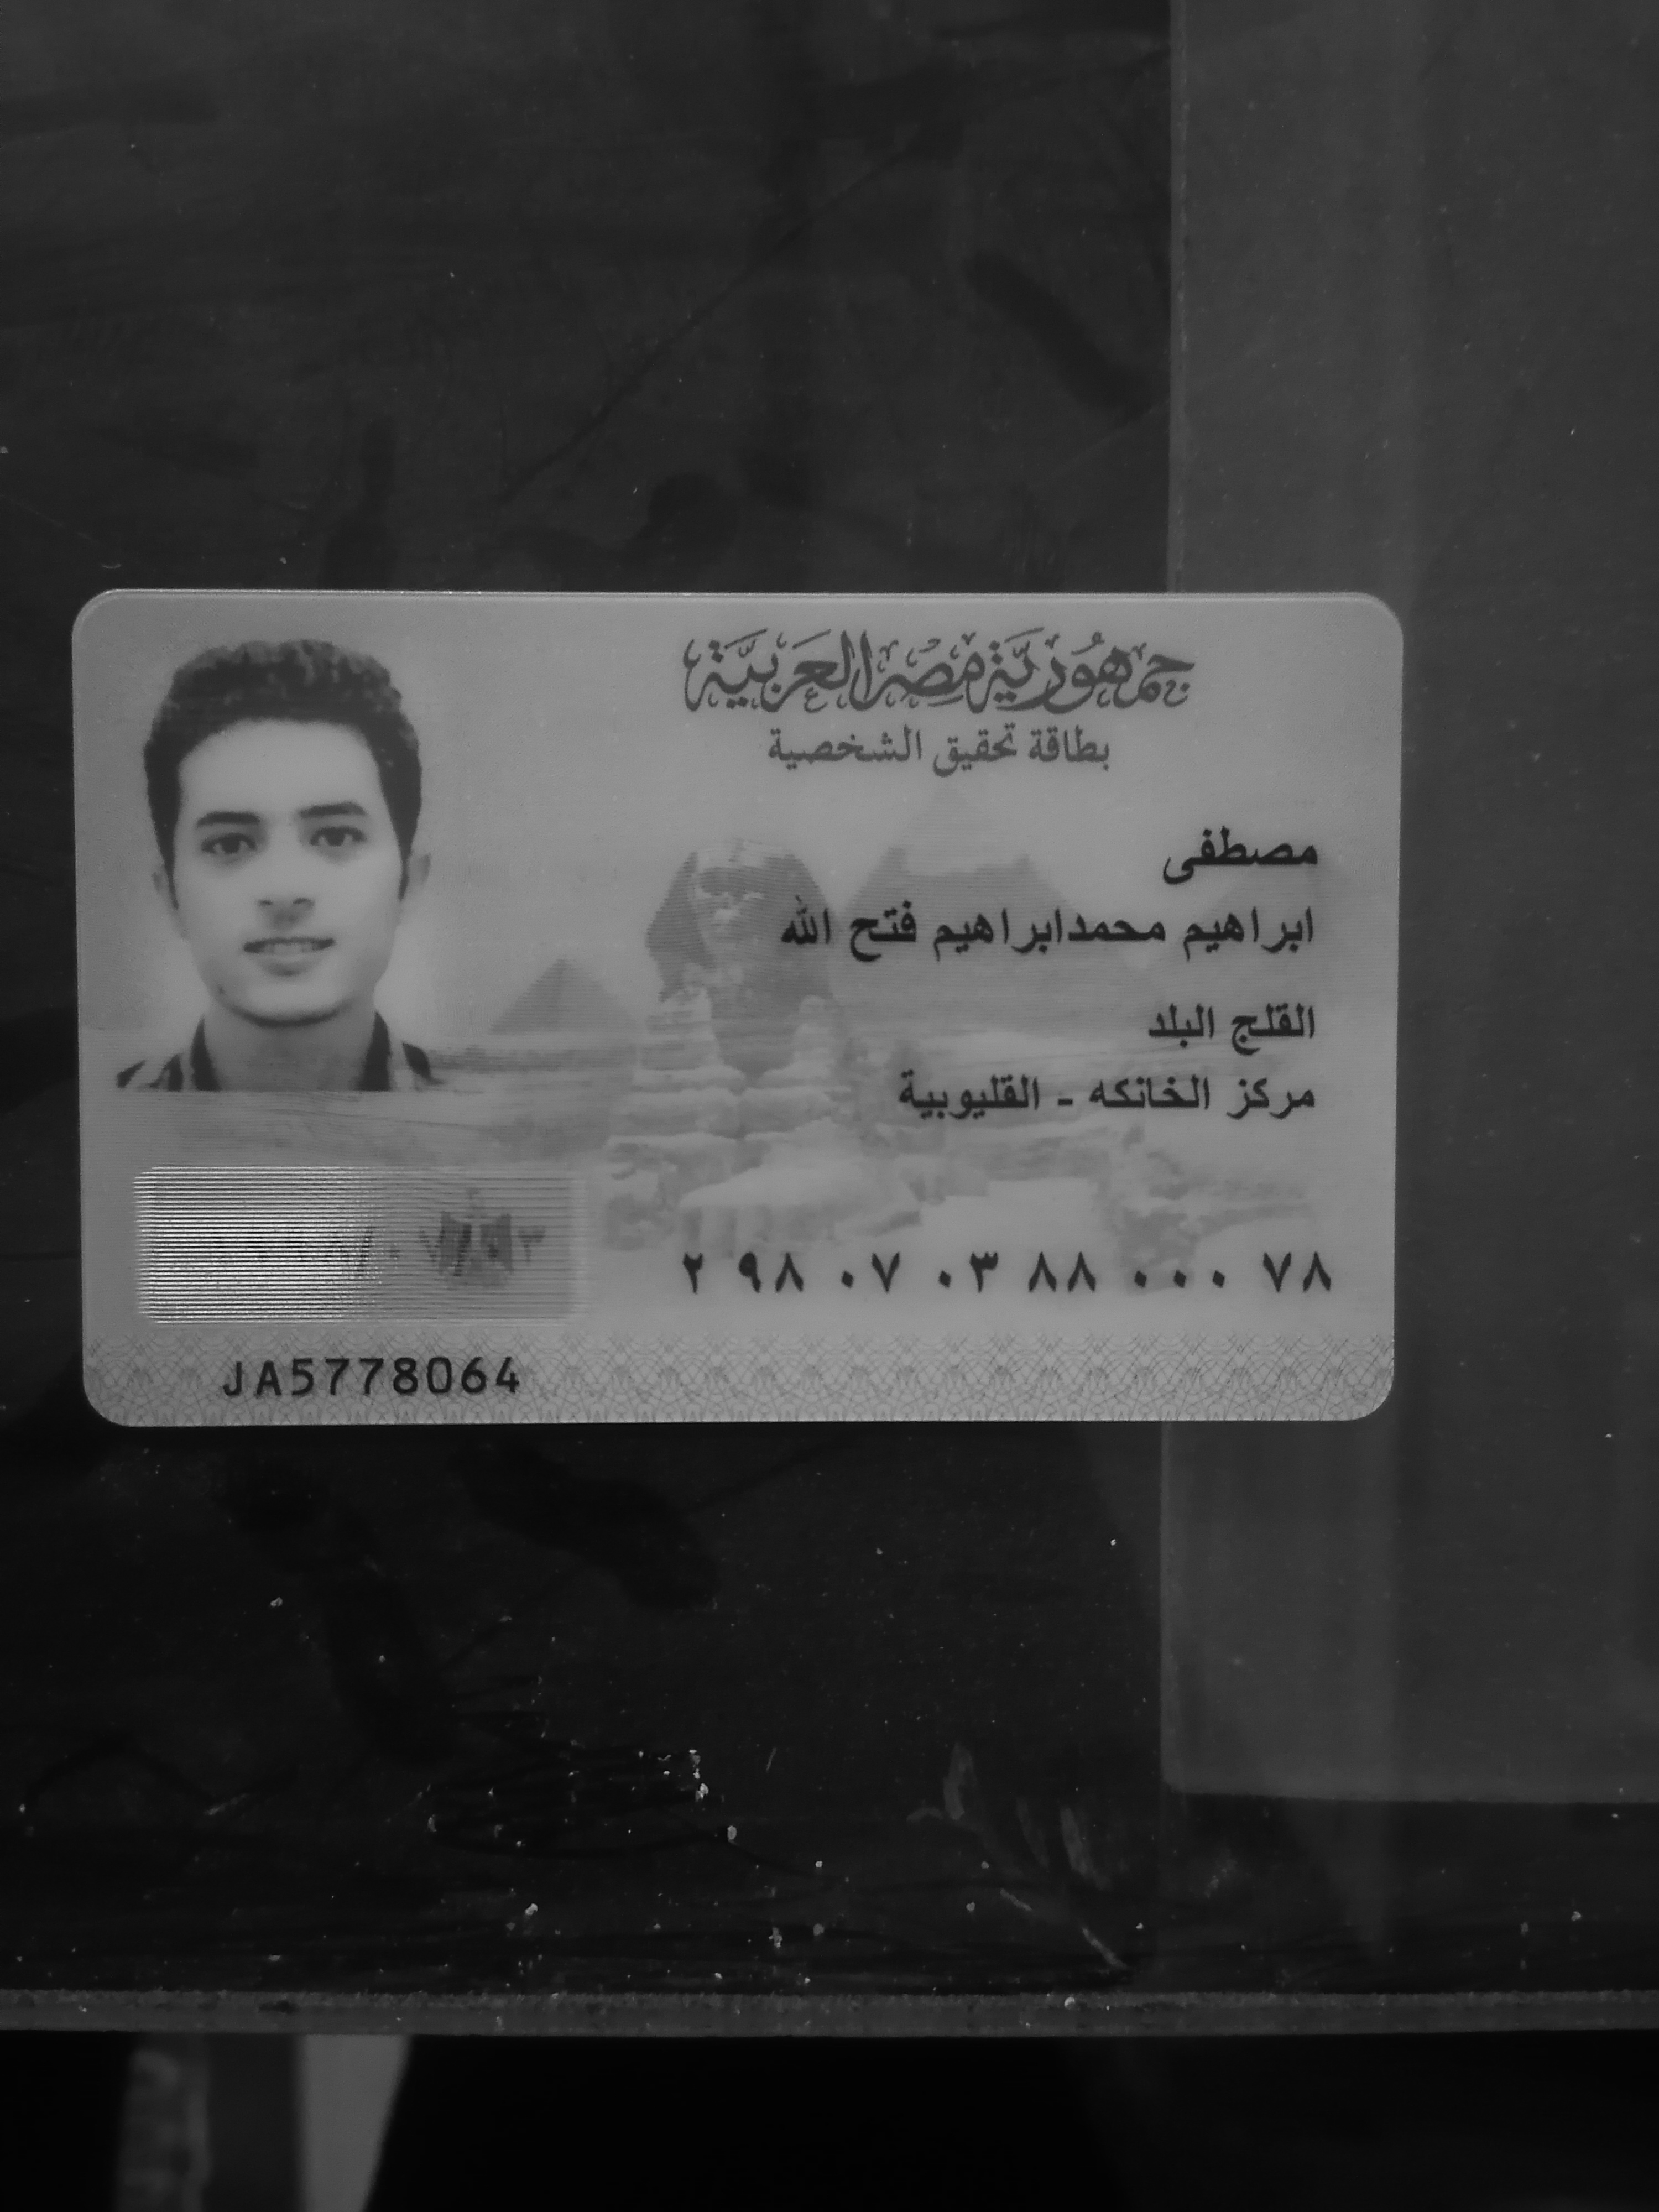

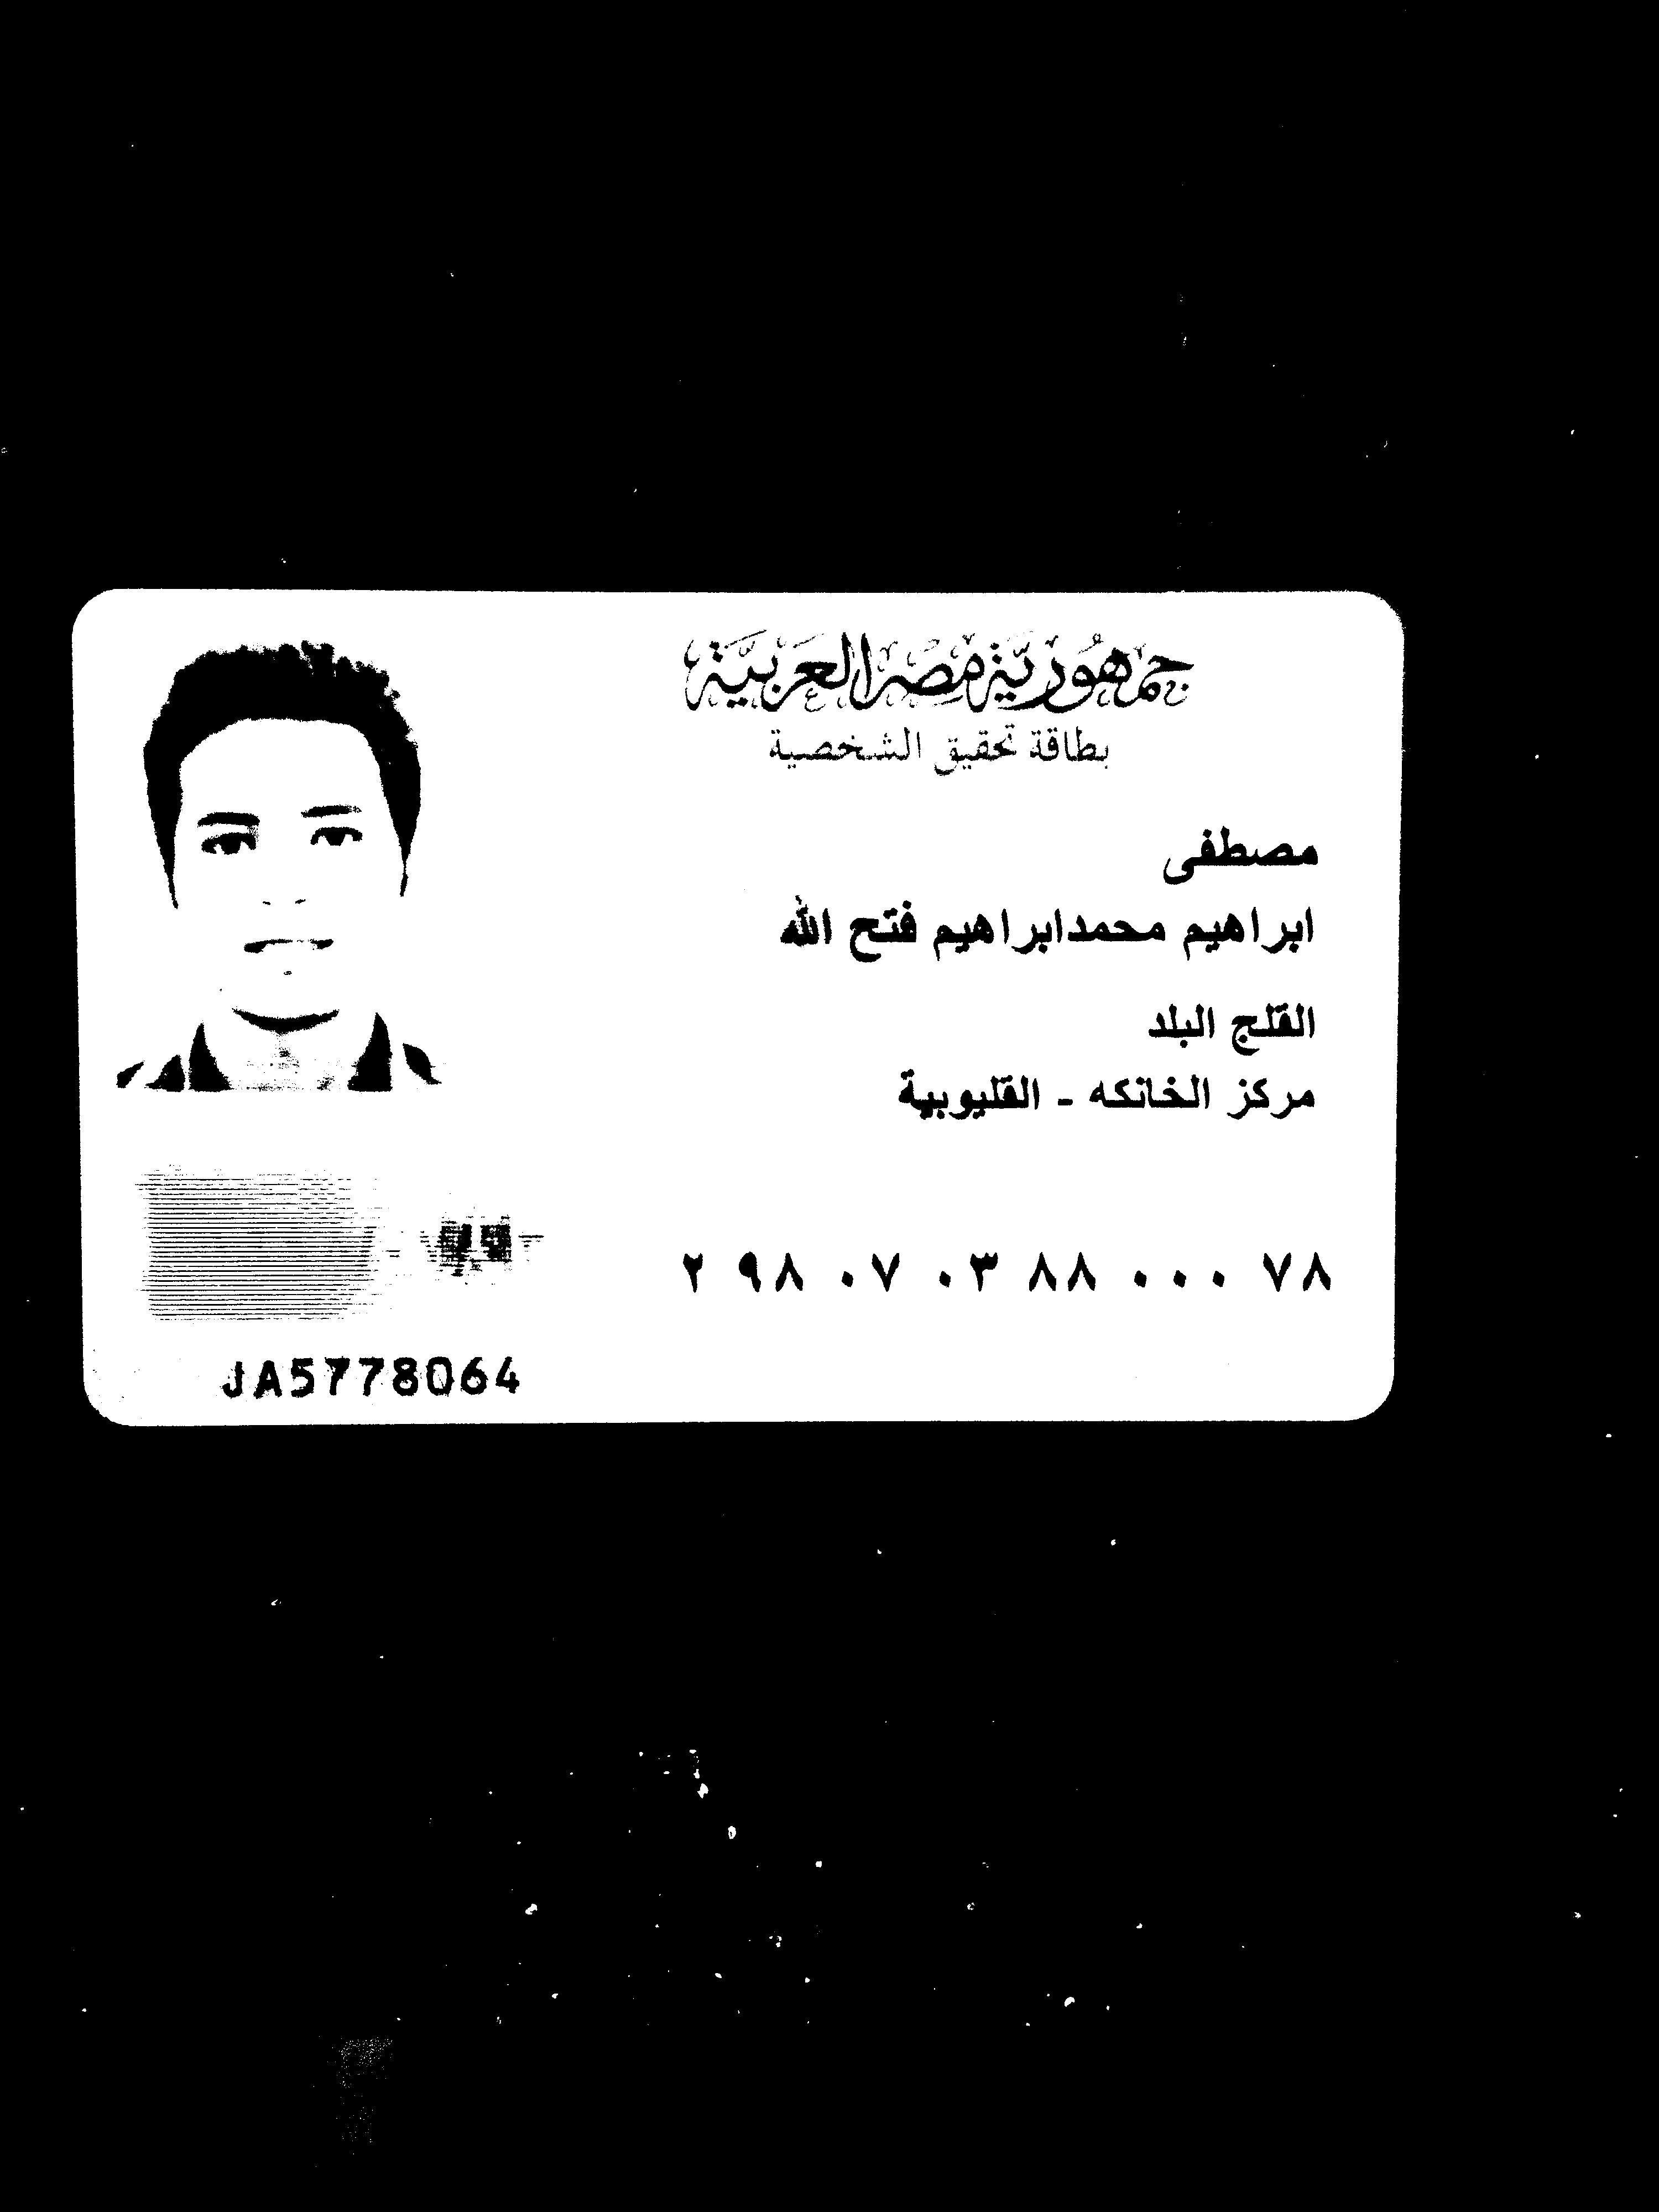

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(binary)

In [31]:
import cv2
import numpy as np

def remove_logo(input_image_path, output_image_path, template_image_path):
    # Read the input image
    img = cv2.imread(input_image_path)
    if img is None:
        print(f"Warning: Unable to load input image at path {input_image_path}.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to obtain a binary image
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours of the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load the template image containing the logo
    template = cv2.imread(template_image_path, 0)
    if template is None:
        print(f"Warning: Unable to load template image at path {template_image_path}.")
        return

    template_h, template_w = template.shape[:2]

    # Iterate through contours to find the logo regions
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Check if the contour area is similar to the template area and the aspect ratio is close to 1
        if abs(w * h - template_w * template_h) < 500 and abs(1 - float(w) / float(h)) < 0.2:
            # Resize the template to the size of the contour
            template_resized = cv2.resize(template, (w, h), interpolation=cv2.INTER_AREA)

            # Calculate the correlation between the contour and the template
            correlation = cv2.matchTemplate(gray[y:y + h, x:x + w], template_resized, cv2.TM_CCOEFF_NORMED)

            # Check if the correlation coefficient is above a threshold
            if np.max(correlation) > 0.7:
                # Replace the logo region with the background color
                img[y:y + h, x:x + w] = np.mean(img[y:y + h, x:x + w], axis=(0, 1), keepdims=True).astype(np.uint8)

    # Save the output image
    cv2.imwrite(output_image_path, img)
    print(f"Output image saved at {output_image_path}")

In [32]:
# Example usage
input_image_path = '44.jpg'
output_image_path = r'C:\Users\ms\Desktop\examples\output\output_image.jpg'
template_image_path = 'logo.jpg'

remove_logo(input_image_path, output_image_path, template_image_path)

Output image saved at C:\Users\ms\Desktop\examples\output\output_image.jpg
